# USE it CAREFULLY\!\!
# modify the file names from. like from disgust to anger

In [ ]:
'''
import RCSystem
import os
import pandas as pd
emotions = 'anger, disgust, fear, happiness, sadness, surprise, neutral'.split(', ')
counter = 1
for target_emotion in 'disgust, fear, happiness, sadness, surprise, neutral'.split(', '):
# for target_emotion in 'disgust, fear, happiness, sadness, surprise'.split(', '):
#     print('\n' + target_emotion + ' top 15:' + '\n')
    #     target_emotion = 'anger'
    folderName = os.path.join("image_analysis/230208Exp12", target_emotion) # py 0.3.7
    if not os.path.exists(folderName):
        continue
    
    ls_name = os.listdir(folderName)
    
    
    result_dic = {}


    for i in ls_name:
        if 'emotion' in i:
            basic_file_set = i[:-12]
#             os.path.join(folderName, i)[:-12]
#             print(basic_file_set)
            
            # change filename
            for j in ls_name:
                if basic_file_set in j:
                    newname = j.replace(target_emotion, emotions[counter-1])
                    
                    src = os.path.join(folderName, j)
                    dst = os.path.join(folderName, newname)
                    if os.path.exists(src):
                        try:
                            os.rename(src, dst)
                        except Exception as e:
                            print(e)
    counter += 1
'''

# 500 Exp

# Find best 15

In [1]:
!pip list | grep feat

py-feat                            0.3.7


In [28]:
check_folder(os.path.join(folderName, 'selected15'))

In [26]:
import shutil
import os
def check_folder(folderName):
    folderPath = os.path.join('', folderName)
    if not os.path.exists(folderPath):
        try:
            os.mkdir(folderPath)
        except Exception as e:
            print(e)


In [90]:
# Step 1 Find top 20
import RCSystem
import os
import pandas as pd

for target_emotion in 'anger, disgust, fear, happiness, sadness, surprise, neutral'.split(', '):
# for target_emotion in 'disgust, fear, happiness, sadness, surprise'.split(', '):
    print('\n' + target_emotion + ' top 15:' + '\n')
    #     target_emotion = 'anger'
    folderName = os.path.join("image_analysis/230208Exp12", target_emotion) # py 0.3.7
#     folderName = os.path.join("image_analysis/230210Exp13Lghting", target_emotion) # py 0.3.7
#     folderName = os.path.join("image_analysis/230206Exp11", target_emotion) # py 0.5.0
    if not os.path.exists(folderName):
        continue
    
    ls_name = os.listdir(folderName)
    
    
    result_dic = {}


    for i in ls_name:
        if 'csv' in i and 'emotion' not in i and 'data' not in i:
            temp = pd.read_csv(os.path.join(folderName, i))
            
            targetID = RCSystem.get_target(target_emotion)
            # 0.5.0
#             result = temp.iloc[:, -9:-1].iloc[0, targetID]
#             fileName = temp.iloc[:, -9:-1].iloc[0, -1]
            
            #0.3.7
#             result = temp.iloc[:, -8:].iloc[0, targetID]
#             fileName = temp.iloc[:, -8:].iloc[0, -1]
            
            # new method
            result = list(temp[target_emotion])[0]
            fileName = list(temp['input'])[0]
            
            result_dic[i] = result
#             print(result)

    #         print(i, result)
    # print(result_dic)

    # in filename order
    # b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
    # for k,v in b.items():
    #     print(k, ":", v)

    # in value order 
    a = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)
    
    # copy top 15 to selected15 folder
    check_folder(os.path.join(folderName, 'selected15'))
    for i in range(15):
        (k,v) = a[i]
        temp_file = k[:-4] + '.png'
        source = os.path.join(folderName, temp_file)
        dstname = os.path.join(folderName, 'selected15', '{}_{}'.format(i+1, temp_file))
        
        try:
            if not os.path.exists(dstname):
                shutil.copyfile(source, dstname)
        except IOError as e:
            print("Unable to copy file. %s" % e)
            exit(1)
        except:
            print("Unexpected error:", sys.exc_info())
            exit(1)
    
#     print(a[:15])
    for i in range(15):
        print(a[i][0][:-4]+'.png', ":%.5f" % a[i][1])
        


anger top 15:

2023_02_08_17_35_40_anger_223.png :0.89457
2023_02_08_17_39_49_anger_314.png :0.89083
2023_02_08_17_47_03_anger_457.png :0.89015
2023_02_08_17_37_54_anger_272.png :0.88034
2023_02_08_17_34_36_anger_198.png :0.87901
2023_02_08_17_49_21_anger_497.png :0.87704
2023_02_08_17_35_30_anger_219.png :0.87699
2023_02_08_17_35_33_anger_220.png :0.87649
2023_02_08_17_36_00_anger_230.png :0.87396
2023_02_08_17_49_28_anger_499.png :0.87360
2023_02_08_17_34_03_anger_185.png :0.87129
2023_02_08_17_38_03_anger_275.png :0.86940
2023_02_08_17_35_16_anger_214.png :0.86835
2023_02_08_17_39_39_anger_311.png :0.86827
2023_02_08_17_35_14_anger_213.png :0.86582

disgust top 15:

2023_02_08_18_04_10_disgust_370.png :0.95862
2023_02_08_18_05_44_disgust_407.png :0.95670
2023_02_08_18_04_04_disgust_368.png :0.95650
2023_02_08_18_04_18_disgust_373.png :0.95592
2023_02_08_18_04_44_disgust_384.png :0.95364
2023_02_08_17_59_18_disgust_255.png :0.95307
2023_02_08_18_07_28_disgust_446.png :0.94988
2023_0

In [ ]:
!pwd

In [ ]:
!pip list | grep torch

In [2]:
import pandas as pd
dic = {'surprise': 0.37850767, 'x1': 86, 'x10': 128, 'x8': 255}
df = pd.DataFrame(dic, index=['surprise'])
print(df)

          surprise  x1  x10   x8
surprise  0.378508  86  128  255


# Draw the Py-Feat rating result

In [2]:
!pwd

/Users/dongshengyang/Downloads/iMacResearch/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts


# Draw the barplot between Prototype and BORFEO

In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
form_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.split(', ')
prototypedata = []
BOA_data = []

path_prot = 'image_analysis/selected_files_OnlineExp/Namba_Coding/Exp8/prototypeFacialExpressions/'
path_boa = 'image_analysis/selected_files_OnlineExp/BOFREO_Top_1/'

# define the sort order
def mysort(emo):
    emo = emo[0].lower()
    if emo == 'anger':
        return 1
    elif emo == 'disgust':
        return 2
    elif emo == 'fear':
        return 3
    elif emo == 'happiness':
        return 4
    elif emo == 'sadness':
        return 5
    elif emo == 'surprise':
        return 6
    elif emo == 'neutral':
        return 7

# get prototype data
for i in list(os.listdir(path_prot)):
    if 'emotion.csv' in i:
        for j in emo_names:
            if j in i:
                df = pd.read_csv(path_prot + i)
                temp_data = df[j].values[0]
                prototypedata.append([j, temp_data])
prototypedata = sorted(prototypedata,key=mysort)          
# print(prototypedata)

# get top1 data
for i in list(os.listdir(path_boa)):
    if 'emotion.csv' in i:
        for j in emo_names:
            if j in i:
                df = pd.read_csv(path_boa + i)
                temp_data = df[j].values[0]
                BOA_data.append([j, temp_data])
BOA_data = sorted(BOA_data,key=mysort)
# print(BOA_data)

data_barplot = [[round(i[1], 4) for i in prototypedata], [round(i[1], 4) for i in BOA_data]]
# print(data_barplot)
    

df = pd.DataFrame(data_barplot, columns = form_names)

# df['type'] = ['Prototypical', 'BORFEO']
print(df)


    Anger  Disgust    Fear  Happiness  Sadness  Surprise  Neutral
0  0.0706   0.0009  0.1230     0.7322   0.2520    0.6678   0.9554
1  0.9362   0.8271  0.8363     0.8955   0.9126    0.9724   0.8947


# To LONG format

In [43]:
print(df)

    anger  disgust    fear  happiness  sadness  surprise  neutral
0  0.0706   0.0009  0.1230     0.7322   0.2520    0.6678   0.9554
1  0.9362   0.8271  0.8363     0.8955   0.9126    0.9724   0.8947


No handles with labels found to put in legend.


Prototypical vs BORFEO, Py-Feat rating 


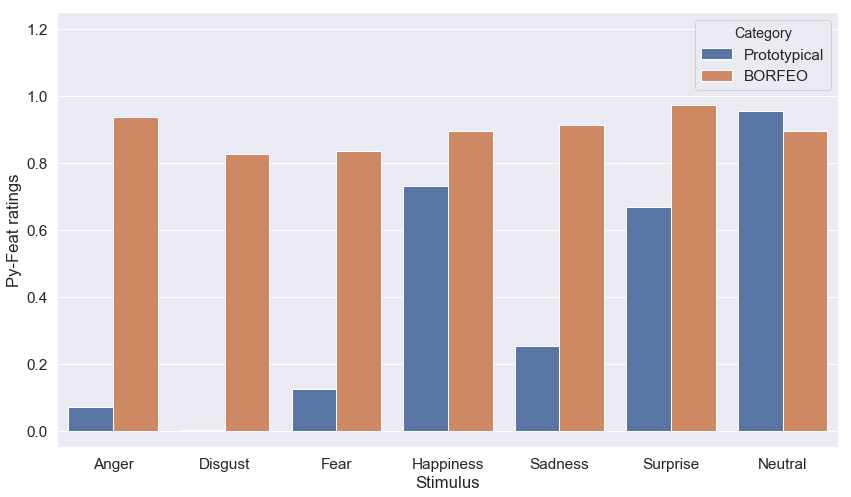

In [4]:
df_bar = pd.melt(df, value_vars=list(df.columns),
                     var_name='Stimulus', value_name='Py-Feat ratings')
newcol = [i for _ in range(7) for i in ['Prototypical', 'BORFEO'] ]
df_bar['Category'] = newcol
# print(df_bar)
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color
#         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.25)
#         plt.title(current_emo, y=-0.12)
plt.legend()

print('Prototypical vs BORFEO, Py-Feat rating ')
ax = sns.barplot(x="Stimulus", y="Py-Feat ratings", hue='Category',  data=df_bar, estimator=np.mean, ci=95, capsize=.05)
plt.show()
fig.savefig('pyfeat_diff.png', dpi=300)

# Find Best 5 with cosine distance

## 1. calculate cosine distance

In [43]:
import pandas as pd
import os
import numpy as np
from scipy.spatial import distance

def cal_cosine_distance(x, y):
    dist = distance.cosine(x, y)
    return dist


def analyze_AU(target_emotion):
    
    folderName = "image_analysis/211223Exp/Exp7/" + target_emotion + '/' + 'openface/'
#     fileName = '2021_12_23_16_55_37_neutral_762.png'

    ls_name = os.listdir(folderName)
    ls_name = [i for i in ls_name if 'csv' in i]

        
    result = {}
    counter = 0
    for i in range(100):
        for j in range(i + 1, 100):
            df1 = pd.read_csv(folderName + ls_name[i]).iloc[:, 5:22]
            vec1 = np.array(list(df1.iloc[0,:]))
            df2 = pd.read_csv(folderName + ls_name[j]).iloc[:, 5:22]
            vec2 = np.array(list(df2.iloc[0,:]))
            cos_dis = cal_cosine_distance(vec1, vec2)
            if cos_dis == 0.0:
                raise Exception('ERROR, counter is ' + str(counter), i, j)
            tmp = [ls_name[i], ls_name[j], cos_dis]
            result[counter] = tmp
            counter += 1
            
    return result
    # Openface

target_emotion = 'neutral'
neu_result = analyze_AU(target_emotion)

## 2. Rescaling

In [47]:
import copy


def rescale(result):
    test = copy.deepcopy(neu_result)
    sorted_test = sorted(test.items(), key=lambda item: item[1][2], reverse = True)
    print('max is:', sorted_test[0][1][2], '\nmin is:', sorted_test[-1][1][2])
    max_v = sorted_test[0][1][2]
    min_v = sorted_test[-1][1][2]
    print('rescaling...')
#     print(len(sorted_test))
    for i in range(len(sorted_test)):
        sorted_test[i][1][2] = (sorted_test[i][1][2] - min_v) / (max_v - min_v)
    print('rescaled.')
    return sorted_test
#     print(sorted_test)
    
recaled_result = rescale(neu_result)


max is: 0.4225160681387361 
min is: 0.00027431997231752714
rescaling...
rescaled.


In [48]:
print(recaled_result[:5])

[(3477, ['2021_12_23_16_51_49_neutral_362.csv', '2021_12_23_16_50_42_neutral_232.csv', 1.0]), (3482, ['2021_12_23_16_51_49_neutral_362.csv', '2021_12_23_16_51_12_neutral_292.csv', 0.9886316484376676]), (2120, ['2021_12_23_16_56_02_neutral_802.csv', '2021_12_23_16_51_49_neutral_362.csv', 0.9836052093182177]), (3355, ['2021_12_23_16_52_50_neutral_472.csv', '2021_12_23_16_51_49_neutral_362.csv', 0.955554953253058]), (3486, ['2021_12_23_16_51_49_neutral_362.csv', '2021_12_23_16_57_55_neutral_992.csv', 0.9233248857507114])]


## 3. calculate the cos_dis in the best 15 sequence

In [74]:
15*14/2

105.0

In [2]:
import numpy as np
from scipy.spatial import distance
a = np.array([0 ,1, 2, 3])
b = np.array([0, 2, 2, 3])

c = a.dot(b)/(np.linalg.norm(a) * np.linalg.norm(b))
def cal_cosine_distance(x, y):
    # The bigger, the more similar
    dist = distance.cosine(x, y)
    return dist
print(c)
d = cal_cosine_distance(a, b)
print(d)

0.9723055853282466
0.027694414671753376


In [18]:
# Step 1 Find top 15
import os
import pandas as pd
import copy
import RCSystem
import numpy as np
from scipy.spatial import distance

def cal_cosine_distance(x, y):
    # The smaller value, the more similar for x and y
    dist = distance.cosine(x, y)
    return dist

def analyze_AU_namelist(target_emotion, nameList):
    folderNameAU = "image_analysis/211223Exp/Exp7/" + target_emotion + '/' + 'openface/'
# #     fileName = '2021_12_23_16_55_37_neutral_762.png'
#     ls_name = os.listdir(folderNameAU)
    ls_name = nameList
#     print(ls_name)
    for i in nameList:
        assert 'csv' in i, print(i)
    result = {}
    counter = 0
    for i in range(len(nameList)):
        for j in range(i + 1, len(nameList)):
            df1 = pd.read_csv(folderNameAU + ls_name[i]).iloc[:, 5:22]
            vec1 = np.array(list(df1.iloc[0,:]))
            df2 = pd.read_csv(folderNameAU + ls_name[j]).iloc[:, 5:22]
            vec2 = np.array(list(df2.iloc[0,:]))
            cos_dis = cal_cosine_distance(vec1, vec2)
            if cos_dis == 0.0:
                raise Exception('ERROR, counter is ' + str(counter), i, j)
            tmp = [ls_name[i], ls_name[j], cos_dis]
            result[counter] = tmp
            counter += 1
    return result


def analyze_AU_namelist2(target_emotion, nameList):
    folderNameAU = "image_analysis/211223Exp/Exp7/" + target_emotion + '/' + 'openface/'
# #     fileName = '2021_12_23_16_55_37_neutral_762.png'
#     ls_name = os.listdir(folderNameAU)
    ls_name = nameList
#     print(ls_name)
    for i in nameList:
        assert 'csv' in i, print(i)
    result = {}
    counter = 0
    for i in range(len(nameList)):
        for j in range(len(nameList)):
            df1 = pd.read_csv(folderNameAU + ls_name[i]).iloc[:, 5:22]
            vec1 = np.array(list(df1.iloc[0,:]))
            df2 = pd.read_csv(folderNameAU + ls_name[j]).iloc[:, 5:22]
            vec2 = np.array(list(df2.iloc[0,:]))
            cos_dis = cal_cosine_distance(vec1, vec2)
#             if cos_dis == 0.0:
#                 raise Exception('ERROR, counter is ' + str(counter), i, j)
            tmp = [ls_name[i], ls_name[j], cos_dis]
            result[counter] = tmp
            counter += 1
    return result
    
# No need
def rescale(result):
    test = copy.deepcopy(result)
    sorted_test = sorted(test.items(), key=lambda item: item[1][2], reverse = True)
    print('max is:', sorted_test[0][1][2], '\nmin is:', sorted_test[-1][1][2])
    max_v = sorted_test[0][1][2]
    min_v = sorted_test[-1][1][2]
    print('rescaling...')
#     print(len(sorted_test))
    for i in range(len(sorted_test)):
        sorted_test[i][1][2] = (sorted_test[i][1][2] - min_v) / (max_v - min_v)
    print('rescaled.')
    
#     sorted_test = sorted(sorted_test, key=lambda item: item[0], reverse = False)
#     print(sorted_test)
    return sorted_test
#     print(sorted_test)



# for target_emotion in ['neutral']:
for target_emotion in 'anger, disgust, fear, happiness, sadness, surprise, neutral'.split(', '):
    print('\n' + target_emotion + ' top 10:' + '\n')
    #     target_emotion = 'anger'
    folderName = "image_analysis/211223Exp/Exp7/" + target_emotion + '/'
    folderNameAU = folderName + 'openface/'
    ls_name = os.listdir(folderName)
    result_dic = {}


    for i in ls_name:
        if 'emotion' in i:
            temp = pd.read_csv(folderName + i)
            targetID = RCSystem.get_target(target_emotion)
            result = temp.iloc[:, -8:].iloc[0, targetID]
            fileName = temp.iloc[:, -8:].iloc[0, -1]
            result_dic[i] = result
    #         print(i, result)
    # print(result_dic)

    # in filename order
    # b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
    # for k,v in b.items():
    #     print(k, ":", v)

    # in value order 
    a = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)
    top_name_list = []
    
    # top 10
    for i in range(10):
#         print(a[i][0][:-12]+'.csv', ":%.5f" % a[i][1])
        top_name_list.append(a[i][0][:-12]+'.csv')
#     print(len(top15_name_list))
#     print(len(top_name_list))
    result_AU2 = analyze_AU_namelist2(target_emotion=target_emotion, nameList=top_name_list)
    
    # similarity
    result_AU = analyze_AU_namelist(target_emotion=target_emotion, nameList=top_name_list)
    test = copy.deepcopy(result_AU)
    sorted_test = sorted(test.items(), key=lambda item: item[1][2], reverse = True)
    print('min similarity is:', 1 - sorted_test[0][1][2], '\nmax similarity is:', 1 - sorted_test[-1][1][2])
#     result_AU = analyze_AU_namelist(target_emotion=target_emotion, nameList=top_name_list)
#     rescaled_result_AU = rescale(result_AU)

# greedy search

    count = 1
#     print('top_name_list', top_name_list, '\n')
    finalResult = []
    finalResult.append([0, top_name_list[0]])
    
    # construct a 10 x 10 matrix
    mat_2d = []
    for i in range(100):
        mat_2d.append(result_AU2[i][2])
    ary = np.array(mat_2d).reshape(10, 10)
    
#     finalResult.append([2, top_name_list[2]])
    while count < 5:
        x_list = []
        y_list = []
#         print()
        for i in range(len(finalResult)):
            x_list.append(finalResult[i][0])

        for i in x_list:
            y_list.append(ary[i])
#         print(y_list)
    #     print(ary[i])
    #     print(np.argmax(ary[i]))
        sum_v = np.zeros(10)
        for i in y_list:
            sum_v += i
        for i in x_list:
            sum_v[i] = 0
        y = np.argmax(sum_v)
        finalResult.append([y, top_name_list[y]])
        count += 1
        print('x_list', x_list)
#         print(sum_v, y)
    #         np.partition(k.flatten(), -2)[-2]
    #         print(ary[x].index(max(ary[x])))
    #     print(max(ary[x]))
    print('Final selection for ' + target_emotion, finalResult)
    
    # show the result
    finalResult = sorted(finalResult, key=lambda x:x[0])
    print('Final selection for ' + target_emotion, finalResult)
    
    
    # Copy files
    sum_folderName = "image_analysis/211223Exp/Exp7/selected_files/" + target_emotion + '/'
    if not os.path.exists(sum_folderName):
        try:
            os.mkdir(sum_folderName)
        except Exception as e:
            print(e)
    import shutil
    for i in finalResult:
        temp = pd.read_csv(folderName + i[1][:-4] + '_emotion.csv')
        targetID = RCSystem.get_target(target_emotion)
        temp_result = temp.iloc[:, -8:].iloc[0, targetID]
        print(i[0], i[1][:-4]+'.png', temp_result)
        tempFileAU = i[1]
        tempFileFig = i[1][:-4]+'.png'
        tempFilePyfeat = i[1][:-4] + '_emotion.csv'
#         shutil.copy(folderNameAU + tempFileAU, sum_folderName)
#         shutil.copy(folderName + tempFileFig, sum_folderName)
#         shutil.copy(folderName + tempFilePyfeat, sum_folderName)
    


anger top 10:

min similarity is: 0.9517222486486695 
max similarity is: 0.9987475673542927
x_list [0]
x_list [0, 5]
x_list [0, 5, 9]
x_list [0, 5, 9, 3]
Final selection for anger [[0, '2021_12_23_15_32_12_anger_772.csv'], [5, '2021_12_23_15_31_17_anger_672.csv'], [9, '2021_12_23_15_33_23_anger_902.csv'], [3, '2021_12_23_15_27_09_anger_212.csv'], [8, '2021_12_23_15_30_17_anger_562.csv']]
Final selection for anger [[0, '2021_12_23_15_32_12_anger_772.csv'], [3, '2021_12_23_15_27_09_anger_212.csv'], [5, '2021_12_23_15_31_17_anger_672.csv'], [8, '2021_12_23_15_30_17_anger_562.csv'], [9, '2021_12_23_15_33_23_anger_902.csv']]
0 2021_12_23_15_32_12_anger_772.png 0.9362358000000001
3 2021_12_23_15_27_09_anger_212.png 0.9316653
5 2021_12_23_15_31_17_anger_672.png 0.9270815999999998
8 2021_12_23_15_30_17_anger_562.png 0.9141308000000001
9 2021_12_23_15_33_23_anger_902.png 0.91367924

disgust top 10:

min similarity is: 0.8175568903481487 
max similarity is: 0.9949124017842896
x_list [0]
x_list 

In [ ]:
result_AU2

In [ ]:
for i in range(100):
    print(result_AU2[i][2])

In [ ]:
import numpy as np
import copy
mat_2d = []
for i in range(100):
    mat_2d.append(result_AU2[i][2])
# print(mat_2d)
ary = np.array(mat_2d).reshape(10, 10)
print(ary)
# simplify
for i in range(10):
    print(result_AU2[i])

In [57]:
# greedy search
count = 1
print(top_name_list)
finalResult = []
finalResult.append([0, top_name_list[0]])
# finalResult.append([2, top_name_list[2]])
while count < 5:
    x_list = []
    y_list = []
    for i in range(len(finalResult)):
        x_list.append(finalResult[i][0])
    
    for i in x_list:
        y_list.append(ary[i])
#     print(ary[i])
#     print(np.argmax(ary[i]))
    sum_v = np.zeros(10)
    for i in y_list:
        sum_v += i
    for i in x_list:
        sum_v[i] = 0
    y = np.argmax(sum_v)
    finalResult.append([y, top_name_list[y]])
    count += 1
    print('x_list', x_list)
    print(sum_v, y)
#         np.partition(k.flatten(), -2)[-2]
#         print(ary[x].index(max(ary[x])))
#     print(max(ary[x]))
print(finalResult)
        

['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_55_43_neutral_772.csv', '2021_12_23_16_57_14_neutral_922.csv', '2021_12_23_16_54_04_neutral_602.csv', '2021_12_23_16_57_08_neutral_912.csv', '2021_12_23_16_54_23_neutral_632.csv', '2021_12_23_16_54_17_neutral_622.csv', '2021_12_23_16_53_07_neutral_502.csv', '2021_12_23_16_57_01_neutral_902.csv']
x_list [0]
[0.         0.0127795  0.02693375 0.00666551 0.0118296  0.01880426
 0.02404708 0.00611905 0.0117973  0.02467036] 2
x_list [0, 2]
[0.         0.01759108 0.         0.02851944 0.02159342 0.03220002
 0.02466972 0.02363479 0.03067247 0.0290808 ] 5
x_list [0, 2, 5]
[0.         0.0350896  0.         0.03481167 0.02735479 0.
 0.03726664 0.02907696 0.03266323 0.03372171] 6
x_list [0, 2, 5, 6]
[0.         0.03983147 0.         0.05617012 0.03833549 0.
 0.         0.04332274 0.05058718 0.03833042] 3
[[0, '2021_12_23_16_55_37_neutral_762.csv'], [2, '2021_12_23_16_55_43_neutral_772.csv'], [5, '2021_12_2

In [4]:
# greedy search
count = 0
finalResult = []
# initialization
finalResult.append(top_name_list[0])
while count < 5:
    for i in rescaled_result_AU:
        if top_name_list[0] in i[1]:
            print(i)
        
    finalResult.append()
    count += 1

(1, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_55_43_neutral_772.csv', 1.0])
(8, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_57_01_neutral_902.csv', 0.9139757493886876])
(5, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_23_neutral_632.csv', 0.890287009680067])
(4, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_57_08_neutral_912.csv', 0.6910244140345828])
(0, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_46_neutral_672.csv', 0.4620428760373799])
(3, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_04_neutral_602.csv', 0.42594040132937827])
(7, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_53_07_neutral_502.csv', 0.4247125413645584])
(2, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_57_14_neutral_922.csv', 0.2296699908561238])
(6, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_17_neutral_622.csv', 0.20890092508064995])


TypeError: append() takes exactly one argument (0 given)

In [37]:
top_name_list

['2021_12_23_16_55_37_neutral_762.csv',
 '2021_12_23_16_54_46_neutral_672.csv',
 '2021_12_23_16_55_43_neutral_772.csv',
 '2021_12_23_16_57_14_neutral_922.csv',
 '2021_12_23_16_54_04_neutral_602.csv',
 '2021_12_23_16_57_08_neutral_912.csv',
 '2021_12_23_16_54_23_neutral_632.csv',
 '2021_12_23_16_54_17_neutral_622.csv',
 '2021_12_23_16_53_07_neutral_502.csv',
 '2021_12_23_16_57_01_neutral_902.csv']

In [39]:
#  print(rescaled_result_AU)
# print(top15_name_list)
finalResult = []
# initialization
finalResult.append(top_name_list[0])
finalResult.append(top_name_list[2])
finalResult.append(top_name_list[-1])

temp = list()
flag = True

for k in top_name_list:
    if k in finalResult:
        continue
    if flag:
        for i in rescaled_result_AU:
            if k in i[1]:
                cal_temp = []
                for j in finalResult:
                    if j in i[1]:
                        cal_temp.append(i[1])
                        print(i)
                
                flag = False
'''
(15, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_53_07_neutral_502.csv', 0.6538017803522568])
(12, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_57_08_neutral_912.csv', 0.6413971883613772])
(10, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_57_14_neutral_922.csv', 0.5685420521175832])
(14, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_54_17_neutral_622.csv', 0.4890354161609417])
(0, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_46_neutral_672.csv', 0.4620428760373799])
(16, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_57_01_neutral_902.csv', 0.37590162046676584])
(11, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_54_04_neutral_602.csv', 0.2565158091286288])
(9, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_55_43_neutral_772.csv', 0.1592082434101359])
(13, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_54_23_neutral_632.csv', 0.15655895830918995])

'''
# for i in rescaled_result_AU:
#     if i[1][0] in finalResult and i[1][1] in finalResult:
#         continue
#     for j in finalResult:
#         if j in i[1]:
#             print(i)
#             temp.append(i)

print(temp)

if temp[0][1][0] not in finalResult:
    finalResult.append(temp[0][1][0])
elif temp[0][1][1] not in finalResult:
    finalResult.append(temp[0][1][1])
else:
    raise Exception('error')
        

print('\nfinalResult', finalResult)
print()
for i in top_name_list:
    print(i)

(0, ['2021_12_23_16_55_37_neutral_762.csv', '2021_12_23_16_54_46_neutral_672.csv', 0.4620428760373799])
(16, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_57_01_neutral_902.csv', 0.37590162046676584])
(9, ['2021_12_23_16_54_46_neutral_672.csv', '2021_12_23_16_55_43_neutral_772.csv', 0.1592082434101359])
[]


IndexError: list index out of range

# Find best Human

In [ ]:
# Step 1 Find top 20
import RCSystem
import os
import pandas as pd

for target_emotion in 'neutral, anger, disgust, fear, happiness, sadness, surprise'.split(', '):
    print('\n' + target_emotion + ' top 15:' + '\n')
    #     target_emotion = 'anger'
    folderName = "image_analysis/220113Exp/Exp9/" + target_emotion + '/'
    ls_name = os.listdir(folderName)
    result_dic = {}


    for i in ls_name:
        if 'axes_data' in i:
            temp = pd.read_csv(folderName + i)
            result = temp.iloc[0, 0]
            fileName = i
            result_dic[i] = result
    #         print(i, result)
    # print(result_dic)

    # in filename order
    # b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
    # for k,v in b.items():
    #     print(k, ":", v)

    # in value order 
    a = dict(sorted(result_dic.items(), key=lambda item: item[1], reverse = True))
    # print(a)
    counter = 0
    for k,v in a.items():
        if counter < 15:
#             if counter == 0 or counter == 9:
            print(k[:-14]+'.png', v * 6 + 1)
            counter += 1

# Find best 15

In [50]:
# Step 1 Find top 20
import RCSystem
import os
import pandas as pd

for target_emotion in 'neutral, anger, disgust, fear, happiness, sadness, surprise'.split(', '):
    print('\n' + target_emotion + ' top 15:' + '\n')
    #     target_emotion = 'anger'
    folderName = "image_analysis/211223Exp/Exp7/" + target_emotion + '/'
    ls_name = os.listdir(folderName)
    result_dic = {}


    for i in ls_name:
        if 'emotion' in i:
            temp = pd.read_csv(folderName + i)
            targetID = RCSystem.get_target(target_emotion)
            result = temp.iloc[:, -8:].iloc[0, targetID]
            fileName = temp.iloc[:, -8:].iloc[0, -1]
            result_dic[i] = result
    #         print(i, result)
    # print(result_dic)

    # in filename order
    # b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
    # for k,v in b.items():
    #     print(k, ":", v)

    # in value order 
    a = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)

    for i in range(15):
        print(a[i][0][:-12]+'.png', ":%.5f" % a[i][1])
        


neutral top 15:

2021_12_23_16_55_37_neutral_762.png :0.89473
2021_12_23_16_54_46_neutral_672.png :0.89404
2021_12_23_16_55_43_neutral_772.png :0.86984
2021_12_23_16_57_14_neutral_922.png :0.86356
2021_12_23_16_54_04_neutral_602.png :0.85753
2021_12_23_16_57_08_neutral_912.png :0.85064
2021_12_23_16_54_23_neutral_632.png :0.84132
2021_12_23_16_54_17_neutral_622.png :0.82084
2021_12_23_16_53_07_neutral_502.png :0.81584
2021_12_23_16_57_01_neutral_902.png :0.80819
2021_12_23_16_52_45_neutral_462.png :0.80806
2021_12_23_16_52_56_neutral_482.png :0.80570
2021_12_23_16_55_50_neutral_782.png :0.80565
2021_12_23_16_55_57_neutral_792.png :0.78642
2021_12_23_16_54_58_neutral_692.png :0.78372

anger top 15:

2021_12_23_15_32_12_anger_772.png :0.93624
2021_12_23_15_28_50_anger_402.png :0.93347
2021_12_23_15_28_56_anger_412.png :0.93250
2021_12_23_15_27_09_anger_212.png :0.93167
2021_12_23_15_30_51_anger_622.png :0.92967
2021_12_23_15_31_17_anger_672.png :0.92708
2021_12_23_15_32_40_anger_822.png

In [27]:
# Analyze Zhu's data
import RCSystem
from feat import Detector
import os
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)
for k in 'anger, disgust, fear, happiness, sadness, surprise'.split(', '):
    name = 'z_{}.png'.format(k)
    # Surprise
    target_emotion = 'temp'
    folderName = "image_analysis/" + target_emotion + '/'
    fileName = folderName + name
    # print(ls_name)
    # result_dic = {}
    # image_prediction = detector.detect_image('image_analysis/211126Exp/Exp1/surprise_1/2021_11_26_15_09_48_surprise_215.png')
    # df = image_prediction.head()
    # targetID = RCSystem.get_target(target_emotion)
    # temp = df.iloc[:, -8:].iloc[0, targetID]

    # print(temp)
    image_prediction = detector.detect_image(fileName)
    df = image_prediction.head()
    # targetID = RCSystem.get_target('disgust')
    # temp = df.iloc[:, -8:].iloc[0, targetID]
    # result_dic[i[:-4]] = temp

    print('\n', df.iloc[0, -8:], '\n')



Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/RF_568.joblib
Using downloaded and ve

In [25]:
print(df.iloc[0, -8:])

anger                                   0.717397
disgust                                 0.266439
fear                                  0.00648508
happiness                             0.00385696
sadness                               0.00302228
surprise                             0.000956825
neutral                               0.00184311
input        image_analysis/temp/zhu_disgust.png
dtype: object


# Exp for 211223

In [19]:
import RCSystem
import os
import pandas as pd

for target_emotion in 'neutral, anger, disgust, fear, happiness, sadness, surprise'.split(', '):
    print('\n' + target_emotion + ' top 10:' + '\n')
    #     target_emotion = 'anger'
    folderName = "image_analysis/211223Exp/Exp7/" + target_emotion + '/'
    ls_name = os.listdir(folderName)
    result_dic = {}


    for i in ls_name:
        if 'emotion' in i:
            temp = pd.read_csv(folderName + i)
            targetID = RCSystem.get_target(target_emotion)
            result = temp.iloc[:, -8:].iloc[0, targetID]
            fileName = temp.iloc[:, -8:].iloc[0, -1]
            result_dic[i] = result
    #         print(i, result)
    # print(result_dic)

    # in filename order
    # b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
    # for k,v in b.items():
    #     print(k, ":", v)

    # in value order 
    a = dict(sorted(result_dic.items(), key=lambda item: item[1], reverse = True))
    # print(a)
    counter = 0
    for k,v in a.items():
        if counter < 10:
#             if counter == 0 or counter == 9:
            print(k, ":%.5f" % v)
            counter += 1


neutral top 10:

2021_12_23_16_55_37_neutral_762_emotion.csv :0.89473
2021_12_23_16_54_46_neutral_672_emotion.csv :0.89404
2021_12_23_16_55_43_neutral_772_emotion.csv :0.86984
2021_12_23_16_57_14_neutral_922_emotion.csv :0.86356
2021_12_23_16_54_04_neutral_602_emotion.csv :0.85753
2021_12_23_16_57_08_neutral_912_emotion.csv :0.85064
2021_12_23_16_54_23_neutral_632_emotion.csv :0.84132
2021_12_23_16_54_17_neutral_622_emotion.csv :0.82084
2021_12_23_16_53_07_neutral_502_emotion.csv :0.81584
2021_12_23_16_57_01_neutral_902_emotion.csv :0.80819

anger top 10:

2021_12_23_15_32_12_anger_772_emotion.csv :0.93624
2021_12_23_15_28_50_anger_402_emotion.csv :0.93347
2021_12_23_15_28_56_anger_412_emotion.csv :0.93250
2021_12_23_15_27_09_anger_212_emotion.csv :0.93167
2021_12_23_15_30_51_anger_622_emotion.csv :0.92967
2021_12_23_15_31_17_anger_672_emotion.csv :0.92708
2021_12_23_15_32_40_anger_822_emotion.csv :0.92274
2021_12_23_15_29_01_anger_422_emotion.csv :0.91821
2021_12_23_15_30_17_anger_56

# Exp for 220107

In [17]:
import RCSystem
import os
import pandas as pd

# prototypeFacialExpressions
target_emotion = 'prototypeFacialExpressions'
folderName = "image_analysis/" + target_emotion + '/'
ls_name = os.listdir(folderName)
result_dic = {}


for i in ls_name:
    if 'emotion' in i:
        temp = pd.read_csv(folderName + i)
        currentName = list(temp.iloc[:, -1])[0].split('_')[-1][:-5]
        print(currentName, '%.4f' % list(temp[currentName])[0])
        print()
        
# hotFacialExpressions
target_emotion = 'hotFacialExpressions'
folderName = "image_analysis/" + target_emotion + '/'
ls_name = os.listdir(folderName)
result_dic = {}


for i in ls_name:
    if 'emotion' in i:
        temp = pd.read_csv(folderName + i)
        currentName = list(temp.iloc[:, -1])[0].split('_')[-1][:-5]
        currentName = currentName.lower()
        print('hot' + currentName, '%.4f' % list(temp[currentName])[0])
        print()

neutral 0.9554

surprise 0.6678

anger 0.0706

fear 0.1230

sadness 0.2520

happiness 0.7322

disgust 0.0009

hotsadness 0.2420

hothappiness 0.1482

hotanger 0.8107

hotfear 0.3000

hotdisgust 0.0003

hotsurprise 0.9724



# Exp for 211216

In [1]:
# Return to StandardPose
import RCSystem
import defaultPose
rb = RCSystem.robot(duration=3)
rb.switch_to_customizedPose(defaultPose.prototypeFacialExpressions['netural'])
rb.connect_ros(True, False)

initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128]
self.nextState [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated


0

# Only Pyfeat

In [1]:
# Surprise pyfeat

import RCSystem
from feat import Detector
import os
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# Surprise
target_emotion = 'anger'
folderName = "image_analysis/" + target_emotion + '/'
ls_name = os.listdir(folderName)
# print(ls_name)
result_dic = {}
# image_prediction = detector.detect_image('image_analysis/211126Exp/Exp1/surprise_1/2021_11_26_15_09_48_surprise_215.png')
# df = image_prediction.head()
# targetID = RCSystem.get_target(target_emotion)
# temp = df.iloc[:, -8:].iloc[0, targetID]

# print(temp)

for i in ls_name:
    if 'png' in i:
        print(folderName + i)
        image_prediction = detector.detect_image(folderName + i)
        df = image_prediction.head()
        targetID = RCSystem.get_target(target_emotion)
        temp = df.iloc[:, -8:].iloc[0, targetID]
        result_dic[i[:-4]] = temp
        
print(result_dic)


/home/dongagent/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/RF_568.joblib
Using downloaded and ve

/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. Thi

Loading emotion model:  resmasknet
Loading facepose model:  pnp
image_analysis/anger/2021_12_16_16_48_03_anger_222.png
image_analysis/anger/2021_12_16_16_46_34_anger_22.png
image_analysis/anger/2021_12_16_16_48_08_anger_232.png
image_analysis/anger/2021_12_16_16_47_23_anger_132.png
image_analysis/anger/2021_12_16_16_47_58_anger_212.png
image_analysis/anger/2021_12_16_16_47_45_anger_182.png
image_analysis/anger/2021_12_16_16_46_17_anger_02.png
image_analysis/anger/2021_12_16_16_46_30_anger_12.png
image_analysis/anger/2021_12_16_16_47_27_anger_142.png
image_analysis/anger/2021_12_16_16_46_47_anger_52.png
image_analysis/anger/2021_12_16_16_46_56_anger_72.png
image_analysis/anger/2021_12_16_16_47_49_anger_192.png
image_analysis/anger/2021_12_16_16_48_23_anger_262.png
image_analysis/anger/2021_12_16_16_47_53_anger_202.png
image_analysis/anger/2021_12_16_16_47_31_anger_152.png
image_analysis/anger/2021_12_16_16_47_18_anger_122.png
image_analysis/anger/2021_12_16_16_48_32_anger_282.png
image_

In [6]:

a = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
# print(a)
for k,v in a.items():
    print(k, ":", v)

2021_12_16_16_46_17_anger_02 : 0.0028695015
2021_12_16_16_46_30_anger_12 : 0.5123836
2021_12_16_16_46_34_anger_22 : 0.44260606
2021_12_16_16_46_38_anger_32 : 0.020881265
2021_12_16_16_46_43_anger_42 : 0.10036325
2021_12_16_16_46_47_anger_52 : 0.16116184
2021_12_16_16_46_52_anger_62 : 0.18188879
2021_12_16_16_46_56_anger_72 : 0.1227856
2021_12_16_16_47_00_anger_82 : 0.08895269
2021_12_16_16_47_05_anger_92 : 0.022913557
2021_12_16_16_47_09_anger_102 : 0.03307024
2021_12_16_16_47_14_anger_112 : 0.019450724
2021_12_16_16_47_18_anger_122 : 0.012705642
2021_12_16_16_47_23_anger_132 : 0.01774911
2021_12_16_16_47_27_anger_142 : 0.006477922
2021_12_16_16_47_31_anger_152 : 0.20473543
2021_12_16_16_47_36_anger_162 : 0.060438685
2021_12_16_16_47_40_anger_172 : 0.2473556
2021_12_16_16_47_45_anger_182 : 0.5161532
2021_12_16_16_47_49_anger_192 : 0.6750193
2021_12_16_16_47_53_anger_202 : 0.41803503
2021_12_16_16_47_58_anger_212 : 0.71717066
2021_12_16_16_48_03_anger_222 : 0.689
2021_12_16_16_48_08_ang

In [21]:
import RCSystem
import os
import pandas as pd

# Surprise
target_emotion = 'anger'
folderName = "image_analysis/" + target_emotion + '/'
ls_name = os.listdir(folderName)
result_dic = {}


for i in ls_name:
    if 'emotion' in i:
        temp = pd.read_csv(folderName + i)
        targetID = RCSystem.get_target(target_emotion)
        result = temp.iloc[:, -8:].iloc[0, targetID]
        fileName = temp.iloc[:, -8:].iloc[0, -1]
        result_dic[i] = result
#         print(i, result)
# print(result_dic)

b = dict(sorted(result_dic.items(), key=lambda item: item[0], reverse = False))
# print(a)
# d = list(b)
# print(d)
for k,v in b.items():
    print(k, ":", v)

2021_12_16_16_46_17_anger_02_emotion.csv : 0.0028695015
2021_12_16_16_46_30_anger_12_emotion.csv : 0.5123835999999999
2021_12_16_16_46_34_anger_22_emotion.csv : 0.44260606
2021_12_16_16_46_38_anger_32_emotion.csv : 0.020881265
2021_12_16_16_46_43_anger_42_emotion.csv : 0.10036325
2021_12_16_16_46_47_anger_52_emotion.csv : 0.16116184
2021_12_16_16_46_52_anger_62_emotion.csv : 0.18188879
2021_12_16_16_46_56_anger_72_emotion.csv : 0.1227856
2021_12_16_16_47_00_anger_82_emotion.csv : 0.08895269
2021_12_16_16_47_05_anger_92_emotion.csv : 0.022913557
2021_12_16_16_47_09_anger_102_emotion.csv : 0.03307024
2021_12_16_16_47_14_anger_112_emotion.csv : 0.019450724
2021_12_16_16_47_18_anger_122_emotion.csv : 0.012705642
2021_12_16_16_47_23_anger_132_emotion.csv : 0.01774911
2021_12_16_16_47_27_anger_142_emotion.csv : 0.006477922
2021_12_16_16_47_31_anger_152_emotion.csv : 0.20473543
2021_12_16_16_47_36_anger_162_emotion.csv : 0.060438685
2021_12_16_16_47_40_anger_172_emotion.csv : 0.2473556
2021_1

# Test for Final result

In [9]:
# Test for Final result
import RCSystem
import defaultPose
import copy
import time

# -----------------------
# 211126
# happiness
emo_name = 'anger'
# final_iter = 5
# total_iter = 30

# Final 1
# Final_result={'target': 0.8102117776870728, 'params': {'x1': 0.0, 'x10': 124.37647287689883, 'x11': 176.33675288673192, 'x16': 114.3405539740198, 'x18': 78.14437031793257, 'x19': 53.77844525910247, 'x20': 251.80970863453527, 'x28': 190.47579328345878, 'x29': 255.0, 'x3': 0.0, 'x30': 40.0519264207376, 'x32': 196.1887532664266, 'x5': 133.7323826515327, 'x6': 56.12368502939337, 'x8': 166.06973851403978, 'x9': 38.29756852969069}}
Final_result={'target': 0.6900188326835632, 'params': {'x1': 0.0, 'x10': 154.1723690329874, 'x11': 226.69371229598522, 'x16': 175.62699253279885, 'x18': 75.0759652868461, 'x19': 100.041051972801, 'x20': 249.30641719096542, 'x28': 177.15063630019768, 'x29': 249.1213822981708, 'x3': 21.39327747341569, 'x30': 14.800087400341754, 'x32': 200.29049953915384, 'x5': 121.92384379358533, 'x6': 198.17572030848567, 'x8': 165.20152839127232, 'x9': 110.81637864005333}}
# ----------------------

neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
finalResult = copy.copy(neutral)
final_name = emo_name + '_final'
for k,v in Final_result["params"].items():
        # print(k,v)
        if "x" in k:
            finalResult[int(k[1:])-1] = round(v)
# x2 = x1, use one axis for eyes upper lid
finalResult[1] = finalResult[0]
# x7 = x6, use one axis for eyes lower lid
finalResult[6] = finalResult[5]
# x13 = x9
finalResult[12] = finalResult[8]
# x17 = x16
finalResult[16] = finalResult[15]
# x22 = x18
finalResult[21] = finalResult[17]
print(finalResult)
finalResult = RCSystem.checkParameters(finalResult)

rb = RCSystem.robot(duration=2)
rb.switch_to_customizedPose(finalResult)
rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True

time.sleep(3)
rb.take_picture(isUsingCounter=False, appendix=emo_name, folder='')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.readablefileName, target_emotion=emo_name))


[0, 0, 21, 128, 122, 198, 198, 165, 111, 154, 227, 0, 111, 0, 0, 176, 176, 75, 100, 249, 0, 75, 0, 0, 0, 0, 0, 177, 249, 15, 0, 200, 128, 128, 122]
initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128]
self.nextState [0, 0, 21, 128, 122, 198, 198, 0, 111, 154, 227, 0, 111, 0, 0, 176, 176, 0, 100, 249, 0, 75, 0, 0, 0, 0, 0, 177, 249, 15, 0, 200, 128, 128, 122]
Smoothly execution activated
Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/donga

/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. Thi

Loading emotion model:  resmasknet
Loading facepose model:  pnp
      anger   disgust      fear  happiness  sadness  surprise   neutral  \
0  0.338262  0.000533  0.016491   0.019717  0.00376  0.589004  0.032232   

                                               input  
0  image_analysis/temp/2021_12_16_17_09_26_anger2...  
pyfeat result:  0.33826247


# modify by axes

In [1]:
# modify by axes

import RCSystem
import defaultPose
import copy
import time

# -----------------------
# 211126
# happiness
emo_name = 'anger'
final_iter = 5
total_iter = 30

# def run_with_axes:

rb = RCSystem.robot(duration=2)
def run_with_axes(target_params):
    target_params = target_params
    neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
    finalResult = copy.copy(neutral)
    for k,v in target_params["params"].items():
            # print(k,v)
            if "x" in k:
                finalResult[int(k[1:])-1] = round(v)
    # x2 = x1, use one axis for eyes upper lid
    finalResult[1] = finalResult[0]
    # x7 = x6, use one axis for eyes lower lid
    finalResult[6] = finalResult[5]
    # x13 = x9
    finalResult[12] = finalResult[8]
    # x17 = x16
    finalResult[16] = finalResult[15]
    # x22 = x18
    finalResult[21] = finalResult[17]
    print(finalResult)
    finalResult = RCSystem.checkParameters(finalResult)

    
    rb.switch_to_customizedPose(finalResult)
    rb.connect_ros(isSmoothly=True, isRecording=False, steps = 30) # isSmoothly = True ,isRecording = True

    
Final_result={'target': 0.8102117776870728, 'params': {'x1': 0.0, 'x10': 124.37647287689883, 'x11': 176.33675288673192, 'x16': 114.3405539740198, 'x18': 78.14437031793257, 'x19': 53.77844525910247, 'x20': 251.80970863453527, 'x28': 190.47579328345878, 'x29': 255.0, 'x3': 0.0, 'x30': 40.0519264207376, 'x32': 196.1887532664266, 'x5': 133.7323826515327, 'x6': 56.12368502939337, 'x8': 166.06973851403978, 'x9': 38.29756852969069}}
# run_with_axes({'params': {'x22': 255}})
run_with_axes({'params': {'x22': 0}})
run_with_axes(Final_result)



initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
[86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128]
self.nextState [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated
[0, 0, 0, 128, 134, 56, 56, 166, 38, 124, 176, 0, 38, 0, 0, 114, 114, 78, 54, 252, 0, 78, 0, 0, 0, 0, 0, 190, 255, 40, 0, 196, 128, 128, 122]
self.lastState [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
self.nextState [0, 0, 0, 128, 134, 56, 56, 0, 38, 124, 176, 0, 38, 0, 0, 114, 114, 0, 54, 252, 0, 78, 0, 0, 0, 0, 0, 190, 255, 40, 0, 196, 128, 128, 122]
Smoothly execution activated


# Analysis for 211209

In [2]:
!pwd

/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts


In [28]:
import RCSystem
import os
import pandas as pd

# Surprise
target_emotion = 'fear'

# for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

fileName = "image_analysis/211209Exp/Exp2/" + target_emotion + '/' + target_emotion +'pyfeat_normalization.csv'
result_dic = {}


temp = pd.read_csv(fileName)
b = temp.values.tolist()
# print(b)
b = list(sorted(b, key=lambda item: item[RCSystem.get_target(target_emotion)], reverse = True))
print(b[1][RCSystem.get_target(target_emotion)], b[1][-1])


0.0981549850079908 image_analysis/211209Exp/fear/2021_12_09_19_28_40_fear_152.png


In [27]:
import RCSystem
import os
import pandas as pd

# Surprise
# target_emotion = 'fear'

for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    fileName = "image_analysis/211209Exp/Exp2/" + target_emotion + '/' + target_emotion +'pyfeat_normalization.csv'
    result_dic = {}


    temp = pd.read_csv(fileName)
    b = temp.values.tolist()
    # print(b)
    b = list(sorted(b, key=lambda item: item[RCSystem.get_target(target_emotion)], reverse = True))
    print(b[0][RCSystem.get_target(target_emotion)], b[0][-1])


0.5301382003014151 image_analysis/211209Exp/anger/2021_12_09_19_24_10_anger_162.png
0.08491012810525887 image_analysis/211209Exp/disgust/2021_12_09_19_25_39_disgust_52.png
0.13758385932471648 image_analysis/211209Exp/fear/2021_12_09_19_27_34_fear_02.png
0.9745555608006456 image_analysis/211209Exp/happiness/2021_12_09_19_31_37_happiness_242.png
0.5342064419141896 image_analysis/211209Exp/sadness/2021_12_09_19_34_12_sadness_282.png
0.9932370256538566 image_analysis/211209Exp/surprise/2021_12_09_19_19_32_surprise_02.png


In [12]:
# pyfeat
import RCSystem
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# image_prediction = detector.detect_image("image_analysis/temp/anger_human2.jpeg")
# df = image_prediction.head()
# print(df.iloc[:, -8:])

# main analysis

for i in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    result = {}
    import os
#     folder = 'anger'
    folder = i
    folderPath = "image_analysis/211209Exp/Exp2/{}/".format(folder)
    counter = 0
    for i in os.listdir(folderPath):
        if 'png' in i:
            image_prediction = detector.detect_image(folderPath + i)
            temp = image_prediction.head().iloc[:, -8:]
            counter += 1
            result[folder + str(counter)] = temp


    # for k,v in result.items():
    #     print(k, v)
    #     print(v['input'][0])

    import pandas as pd
    import numpy as np

    a = list(list(result.items())[0][1])


    columns1 = a
    columns2 = a[0:6]
    col2 = a[-1]
    columns2.append(col2)

    def normalization(lst):
        assert lst.shape == (8,)
        a = lst[:6]
        b = lst[-1]
        a_sum = sum(a)
        temp = [i/a_sum for i in a]
    #     assert sum(temp) == 1.0, sum(temp)
        a = temp
        a.append(b)
        return a

    df = []
    for j,k in result.items():
        temp = k.to_numpy()
        temp = normalization(temp[0])
    #     print(temp)
        df.append(temp)

    df = np.array(df)
    df = pd.DataFrame(df, columns = columns2)
    # print(df)
    name = folderPath + folder + 'pyfeat_normalization.csv'
    print(name)

#     df.to_csv(name, index=False)
#     print(df)
    

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/RF_568.joblib
Using downloaded and ve

/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. Thi

Loading emotion model:  resmasknet
Loading facepose model:  pnp
image_analysis/211209Exp/Exp2/anger/angerpyfeat_normalization.csv
image_analysis/211209Exp/Exp2/disgust/disgustpyfeat_normalization.csv
image_analysis/211209Exp/Exp2/fear/fearpyfeat_normalization.csv
image_analysis/211209Exp/Exp2/happiness/happinesspyfeat_normalization.csv
image_analysis/211209Exp/Exp2/sadness/sadnesspyfeat_normalization.csv
image_analysis/211209Exp/Exp2/surprise/surprisepyfeat_normalization.csv


c is  anger 0.2868370982337506
c is  disgust 0.0348692009716811
c is  fear 0.13758385706574106
c is  happiness 0.9671000857642323
c is  sadness 0.45754403289058665
c is  surprise 0.9932370258027522
6
[[0.2868370982337506, 0.08479788610594809, 0.04754107347483233, 0.004927209011335515, 0.22405003398534537, 0.35184669918878814], [0.008586039495369818, 0.0348692009716811, 0.014838770635549182, 0.07612357682987214, 0.08235255364128709, 0.7832298584262407], [0.02630743521696928, 0.03748809841264197, 0.13758385706574106, 0.0066871975842372686, 0.0184527602595576, 0.7734806514608528], [0.001882025460569351, 0.005811688164054663, 0.0013789172215316935, 0.9671000857642323, 0.015314919436919044, 0.008512363952692836], [0.03326565457679442, 0.027674250176220293, 0.06540536497189207, 0.005255552205296507, 0.45754403289058665, 0.4108551451792101], [0.0002262375000177806, 0.00020938938949385986, 0.0019197305078376642, 0.0032628458097722396, 0.0011447709901262573, 0.9932370258027522]]
(6, 6)


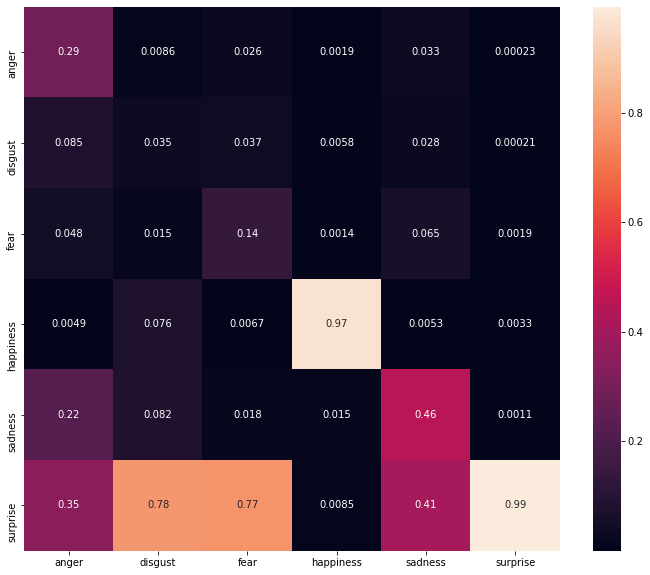

In [287]:
#  for Baseline, use emotion file
new_matrix = []

def normalization(lst):
    assert lst.shape == (8,)
    a = lst[:6]
    b = lst[-1]
    a_sum = sum(a)
    temp = [i/a_sum for i in a]
#     assert sum(temp) == 1.0, sum(temp)
    a = temp
    a.append(b)
    return a

new_matrix = []
counter = 0
# for i in ['anger']:
for i in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    result = {}
    import os
#     folder = 'anger'
    folder = i
    folderPath = "image_analysis/211209Exp/{}/".format(folder)
    
#     df = pd.read_csv(folderPath + i + 'pyfeat_normalization.csv')
    
    for j in os.listdir(folderPath):
        if '_02_emotion.csv' in j:
            df = pd.read_csv(folderPath + j)
#             print(df)
            temp = df.to_numpy()
            temp = temp.reshape(9, )
#             print(temp.shape)
            
            c = normalization(temp[1:])
#             print(c)
            print('c is ', i, c[counter])
            counter += 1
            new_matrix.append(c[:-1])
#             print(c[:-1])
print(counter)
print(new_matrix)
print(np.array(new_matrix).shape)
df = pd.DataFrame(np.array(new_matrix).T, columns = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'], index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'])

# print(df)


# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(12,10)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------


# sn.heatmap(dif, cmap="inferno", fmt = 'd', linewidth = 2, yticklabels=['neutral', "anger", "disgust", "fear", "happyness", "sadness", "surprise"],
#           xticklabels=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35'])
# plt.show()
# fig.savefig("emotion_to_actuators.png", format="png", dpi=400)

sn.heatmap(df, annot=True)
# plt.show()
fig.savefig("baseline_matrix_analysis.png", format="png", dpi=400)
    


[[0.28683709942587826, 0.08479788454091385, 0.04754107472806219, 0.004927209168972153, 0.22405003117546515, 0.3518467009607084], [0.00858603941128868, 0.034869200188352066, 0.014838770553000041, 0.07612357684142032, 0.08235255277738224, 0.7832298602285567], [0.02630743562027604, 0.03748809861529483, 0.13758385932471648, 0.006687197685419992, 0.01845276050000933, 0.7734806482542833], [0.0018820255401910358, 0.005811688399753005, 0.0013789172759528796, 0.9671000852614128, 0.01531491943823365, 0.008512364084456669], [0.033265654879355934, 0.027674250067010013, 0.06540536367241212, 0.005255552196172961, 0.4575440357107781, 0.4108551434742708], [0.0002737483149424625, 0.00026209583587067867, 0.002014602123131036, 0.003960845730249002, 0.0016889095148209807, 0.991799798480986]]


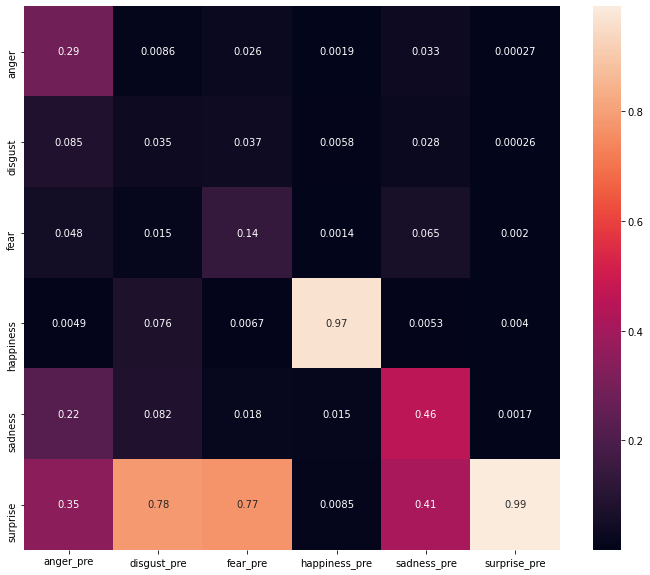

In [264]:
# for Baseline

import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt


new_matrix = []

# for i in ['anger']:
for i in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    result = {}
    import os
#     folder = 'anger'
    folder = i
    folderPath = "image_analysis/211209Exp/{}/".format(folder)
    counter = 0
    df = pd.read_csv(folderPath + i + 'pyfeat_normalization.csv')
    baseline_index = 0
    
    
#     for j in df['input']:
#         if '_02.png' in j:

#             baseline_index = df.index[(df['input'] == j)].tolist()
#             baseline_index = baseline_index[0]

#     print(baseline_index)
#     print(df.iloc[baseline_index])
#     print(list(df.iloc[baseline_index].iloc[0:6]))

    df = df.sort_values(by='input', ascending=True)
#     print(list(df['input']))
    new_matrix.append(list(df.iloc[0])[:-1])
#     new_matrix.append(list(df.iloc[baseline_index].iloc[0:6]))
    
print(new_matrix)
df = pd.DataFrame(np.array(new_matrix).T, columns = ['anger_pre', 'disgust_pre', 'fear_pre', 'happiness_pre', 'sadness_pre', 'surprise_pre'], index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'])

# print(df)


# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(12,10)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------


# sn.heatmap(dif, cmap="inferno", fmt = 'd', linewidth = 2, yticklabels=['neutral', "anger", "disgust", "fear", "happyness", "sadness", "surprise"],
#           xticklabels=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35'])
# plt.show()
# fig.savefig("emotion_to_actuators.png", format="png", dpi=400)

sn.heatmap(df, annot=True)
plt.show()
fig.savefig("baseline_matrix_analysis.png", format="png", dpi=400)

max of anger is:  0.5301382003014151
max of disgust is:  0.08491012810525887
max of fear is:  0.13758385932471648
max of happiness is:  0.9745555608006456
max of sadness is:  0.5342064419141896
max of surprise is:  0.9932370256538566


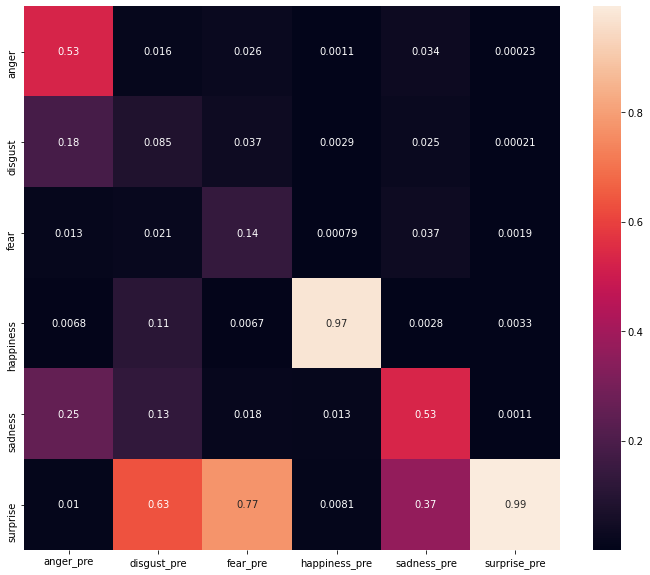

In [230]:
# BOA use index


new_matrix = []
for i in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    result = {}
    import os
#     folder = 'anger'
    folder = i
    folderPath = "image_analysis/211209Exp/{}/".format(folder)
    counter = 0
    df = pd.read_csv(folderPath + i + 'pyfeat_normalization.csv')

    print('max of ' + i + ' is: ', max(df[i]))
    j = max(df[i])
    max_index = df.index[(df[i] == j)].tolist()
    max_index = max_index[0]
#     print(max_index)
    new_matrix.append(list(df.iloc[max_index].iloc[0:6]))
    
    
# print(new_matrix)



df = pd.DataFrame(np.array(new_matrix).T, columns = ['anger_pre', 'disgust_pre', 'fear_pre', 'happiness_pre', 'sadness_pre', 'surprise_pre'], index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'])

# print(df)


# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(12,10)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

sn.heatmap(df, annot=True)
plt.show()
fig.savefig("Max_matrix_analysis.png", format="png", dpi=400)


BOA MAX anger ：  0.5301382003014151
BOA MAX disgust ：  0.08491012810525887
BOA MAX fear ：  0.13758385932471648
BOA MAX happiness ：  0.9745555608006456
BOA MAX sadness ：  0.5342064419141896
BOA MAX surprise ：  0.9932370256538566
[[0.5301382003014151, 0.18463070940327997, 0.013473002832989951, 0.0067595653181773034, 0.2548452257658585, 0.010153296378279155], [0.015502752279054968, 0.08491012810525887, 0.021396510281323902, 0.11251188398062753, 0.13202532912463774, 0.633653396229097], [0.02630743562027604, 0.03748809861529483, 0.13758385932471648, 0.006687197685419992, 0.01845276050000933, 0.7734806482542833], [0.0011042902214913773, 0.002869855980058915, 0.0007903251097778687, 0.9745555608006456, 0.012567902735337215, 0.008112065152689083], [0.033685825033921785, 0.025242079032368223, 0.03718271894608069, 0.002774545382773902, 0.5342064419141896, 0.3669083896906658], [0.0002262375018132235, 0.00020938939033785236, 0.001919730560463559, 0.003262845896888713, 0.0011447709966400596, 0.99323

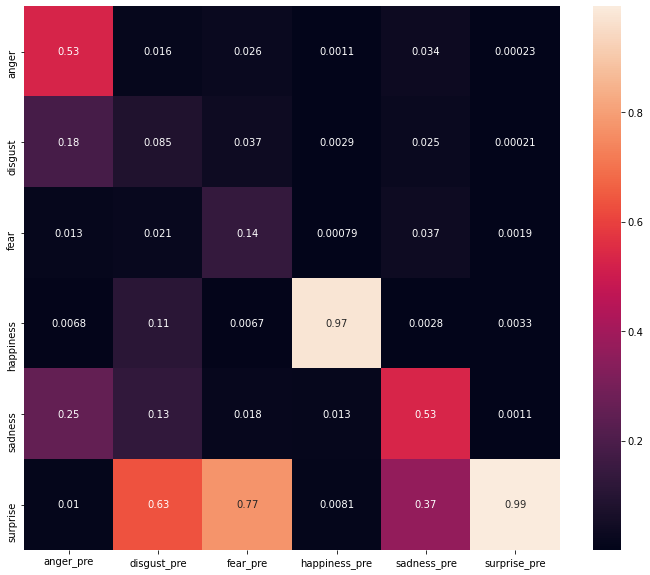

In [286]:
# BOA use sort

new_matrix = []
counter = 0
for i in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    result = {}
    import os
#     folder = 'anger'
    folder = i
    folderPath = "image_analysis/211209Exp/{}/".format(folder)
    df = pd.read_csv(folderPath + i + 'pyfeat_normalization.csv')
    df = df.sort_values(by=i, ascending=False)
#     print(df)
#     print(list(df.iloc[0]))
    print('BOA MAX', i, '： ', df.iloc[0][counter])
    counter += 1
    new_matrix.append(list(df.iloc[0])[:-1])
    
print(new_matrix)


df = pd.DataFrame(np.array(new_matrix).T, columns = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'], index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'])

# print(df)


# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(12,10)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

sn.heatmap(df, annot=True)
# plt.show()
fig.savefig("Max_matrix_analysis.png", format="png", dpi=400)


['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']


In [2]:
!pwd

/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts


# Temp analyze


In [ ]:
import defaultPose
import numpy as np

for target_emotion in 'anger, disgust, fear, happiness, sadness, surprise'.split(', '):
    # target_emotion = 'anger'
    baseline=defaultPose.prototypeFacialExpressions[target_emotion]
    neutral_baseline = defaultPose.prototypeFacialExpressions["netural"]
    subtract = abs(np.array(neutral_baseline) - np.array(baseline))
    probe_param = {}
    for i in range(len(subtract)):
        if subtract[i] != 0:
            probe_param["x{}".format(i+1)] = subtract[i]
    print("if target_emotion == '{}':".format(target_emotion))
    print('# {}'.format(target_emotion))
    print('optimizer.probe(params=' + str(probe_param) + ', lazy=True,)')
    print()

In [5]:
import os
folder = 'anger'
folderPath = "image_analysis/{}/".format(folder)
for i in os.listdir(folderPath):
    if '1.png' in i:
        os.remove(i)

2021_12_09_18_45_43_anger_11.png
2021_12_09_18_45_48_anger_21.png
2021_12_09_18_45_52_anger_31.png
2021_12_09_18_45_35_anger_01.png
2021_12_09_18_45_56_anger_41.png


In [6]:
# Return to StandardPose
import RCSystem
import defaultPose
rb = RCSystem.robot(duration=3)
rb.switch_to_customizedPose(defaultPose.prototypeFacialExpressions['surprise'])
rb.connect_ros(True, False)

initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128, 0]
self.nextState [0, 0, 128, 128, 128, 0, 0, 255, 0, 128, 0, 255, 0, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated


0

In [5]:
# Return to StandardPose
import RCSystem

rb = RCSystem.robot(duration=3)
rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)


initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128, 0]
self.nextState [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated


0

In [2]:
# Return to StandardPose
import RCSystem

rb = RCSystem.robot(duration=3)
# rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
# rb.connect_ros(True, False)

rb.switch_to_customizedPose([86, 86, 128, 128, 128, 187, 187, 0, 0, 0, 96, 0, 0, 0, 242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122])
rb.connect_ros(True, False)
import time
time.sleep(3)

# rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
# rb.connect_ros(True, False)




initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128]
self.nextState [86, 86, 128, 128, 128, 187, 187, 0, 0, 0, 96, 0, 0, 0, 242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated


In [ ]:
import defaultPose
import numpy as np
neutral_baseline = defaultPose.prototypeFacialExpressions["netural"]
baseline = defaultPose.prototypeFacialExpressions["happiness"]

subtract = abs(np.array(neutral_baseline) - np.array(baseline))
axes = {}
for i in range(len(subtract)):
    if subtract[i] != 0:
        axes["x{}".format(i+1)] = subtract[i]
print(axes)

subtract = abs(np.array(defaultPose.prototypeFacialExpressions["happiness"]) - np.array(defaultPose.hotExpressions["hotHappiness"]))
print(subtract)
axes = {}
for i in range(len(subtract)):
    if subtract[i] != 0:
        axes["x{}".format(i+1)] = subtract[i]
print(axes)
# anger [1, 2, 6, 7, 11, 15]
# Happiness[6, 7, 9, 13, 16, 17, 18, 22]

# Analysis for 211126

In [11]:
import RCSystem
import os
import pandas as pd

# Surprise
# target_emotion = 'anger'

for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:

    folderName = "image_analysis/211126Exp/Exp1/" + target_emotion + '/'
    ls_name = os.listdir(folderName)
    result_dic = {}


    for i in ls_name:
        if 'emotion' in i:
            temp = pd.read_csv(folderName + i)
            targetID = RCSystem.get_target(target_emotion)
            result = temp.iloc[:, -8:].iloc[0, targetID]
            fileName = temp.iloc[:, -8:].iloc[0, -1]
            result_dic[i] = result
    #         print(i, result)
    # print(result_dic)

    b = list(sorted(result_dic.items(), key=lambda item: item[1], reverse = True))
    print(b[0])
# d = list(b)
# print(d)
# for k,v in b.items():
#     print(k, ":", v)

('2021_11_26_14_49_53_anger_1emotion.csv', 0.01608958)
('2021_11_26_14_57_25_disgust_82emotion.csv', 0.0017588034)
('2021_11_26_14_58_23_fear_92emotion.csv', 0.03841522)
('2021_11_26_15_02_40_happiness_138emotion.csv', 0.9010077)
('2021_11_26_15_09_02_sadness_207emotion.csv', 0.46752727)
('2021_11_26_15_21_31_surprise_13emotion.csv', 0.9161634)


In [8]:
import RCSystem
import defaultPose
import copy
import time

# -----------------------
# 211126
# happiness
emo_name = 'anger'
final_iter = 5
total_iter = 30



# -----------------------
# 211122
# Anger
# Best 
# Final_result = {'target': 0.018799269571900368, 'params': {'x11': 41.000005745751935, 'x15': 101.75836276831566, 'x6': 22.061358723618913}}

# Happiness
# Best # 22
# [86, 86, 128, 128, 128, 62, 62, 0, 253, 0, 0, 0, 253, 0, 0, 172, 172, 127, 0, 0, 0, 127, 0, 0, 0, 0, 0, 141, 69, 0, 0, 84, 128, 128, 122]
# Final_result = {'target': 0.8695987462997437, 'params': {'x16': 171.59800310665995, 'x18': 126.68641049639601, 'x28': 141.1315389891181, 'x29': 68.71561151609762, 'x32': 84.15255955995656, 'x6': 62.45892190919146, 'x9': 252.7459651617753}}
Final_result = {'params': {'x11': 152.657913470244, 'x15': 39.7847533128213, 'x6': 39.7786026857317}}


# ----------------------

neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
finalResult = copy.copy(neutral)
final_name = emo_name + '_final_{}_{}'.format(final_iter, total_iter)
for k,v in Final_result["params"].items():
        # print(k,v)
        if "x" in k:
            finalResult[int(k[1:])-1] = round(v)
# x2 = x1, use one axis for eyes upper lid
finalResult[1] = finalResult[0]
# x7 = x6, use one axis for eyes lower lid
finalResult[6] = finalResult[5]
# x13 = x9
finalResult[12] = finalResult[8]
# x17 = x16
finalResult[16] = finalResult[15]
# x22 = x18
finalResult[21] = finalResult[17]
print(finalResult)
finalResult = RCSystem.checkParameters(finalResult)

rb = RCSystem.robot(duration=2)
rb.switch_to_customizedPose(finalResult)
rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True

time.sleep(3)
rb.take_picture(isUsingCounter=False, appendix=emo_name, folder='')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.readablefileName, target_emotion=emo_name))


[86, 86, 128, 128, 128, 40, 40, 0, 0, 0, 153, 0, 0, 0, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
initialize_robotParams


Smoothly execution activated
return_to_stable_state, self.robotParams are all set
self.lastState [64, 64, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 128, 128, 128, 0]
self.nextState [86, 86, 128, 128, 128, 40, 40, 0, 0, 0, 153, 0, 0, 0, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
Smoothly execution activated
Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/py_feat-0.3.7-py3.8.egg/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packag

In [ ]:
neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
finalResult = copy.copy(neutral)
for k,v in Final_result["params"].items():
        # print(k,v)
        if "x" in k:
            finalResult[int(k[1:])-1] = round(v)
finalResult[1] = finalResult[0]
finalResult[6] = finalResult[5]
# print(finalResult)
finalResult = RCSystem.checkParameters(finalResult)

rb = RCSystem.robot(duration=3)
rb.switch_to_customizedPose(finalResult)
rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
time.sleep(3)
rb.take_picture(isUsingCounter=False, appendix='_test')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.fileName, target_emotion="Happiness"))

# time.sleep(10)



In [ ]:
# Standard angry
rb.switch_to_customizedPose(defaultPose.prototypeFacialExpressions["happiness"])
rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
time.sleep(3)
rb.take_picture(isUsingCounter=False, appendix='prototypehappiness_test')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.fileName, target_emotion="Happiness"))

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)

In [ ]:
import RCSystem
import defaultPose
import time
rb = RCSystem.robot(duration=2)

rb.switch_to_customizedPose(defaultPose.prototypeFacialExpressions["happiness"])
rb.connect_ros(True, False)
time.sleep(2)
rb.take_picture(isUsingCounter=False, appendix='prototypehappiness_test')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.fileName, target_emotion="Happiness"))

time.sleep(3)
rb.switch_to_customizedPose(defaultPose.hotExpressions["hotHappiness"])
rb.connect_ros(True, False)
time.sleep(2)
rb.take_picture(isUsingCounter=False, appendix='prototypehappiness_test')
print("pyfeat result: ", RCSystem.py_feat_analysis(img=rb.fileName, target_emotion="Happiness"))




In [ ]:
a = [49, 49, 128, 128, 128, 196, 196, 0, 0, 0, 158, 0, 0, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
# a = [216, 216, 128, 128, 128, 138, 138, 0, 0, 0, 183, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
a = [198, 198, 128, 128, 128, 95, 95, 0, 0, 0, 225, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]
print(a)
# a = copy.copy(rb.AUPose['StandardPose'])
# a[15],a[16] = 200,200
# a[17]=100
# a[21]=a[17]
# a[27]=100
# a[31]=200
rb.switch_to_customizedPose(a)
rb.connect_ros(True, False)

In [ ]:
import RCSystem

rb = RCSystem.robot(duration=3)
rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)


# Only Pyfeat

In [ ]:
# Human pyfeat

import RCSystem
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

image_prediction = detector.detect_image("image_analysis/temp/anger_human2.jpeg")
df = image_prediction.head()
print(df.iloc[:, -8:])




In [ ]:
# Surprise pyfeat

import RCSystem
from feat import Detector
import os
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# Surprise
target_emotion = 'surprise'
folderName = "image_analysis/211126Exp/Exp1/surprise_1/"
ls_name = os.listdir(folderName)
print(ls_name)
result_dic = {}
# image_prediction = detector.detect_image('image_analysis/211126Exp/Exp1/surprise_1/2021_11_26_15_09_48_surprise_215.png')
# df = image_prediction.head()
# targetID = RCSystem.get_target(target_emotion)
# temp = df.iloc[:, -8:].iloc[0, targetID]

# print(temp)
for i in ls_name:
#     try:
    print(folderName + i)
    image_prediction = detector.detect_image(folderName + i)
    df = image_prediction.head()
    targetID = RCSystem.get_target(target_emotion)
    temp = df.iloc[:, -8:].iloc[0, targetID]
    result_dic[i[:-4]] = temp
#     except Exception as e:
#         print(e)
#         break

In [ ]:
for k, v in result_dic:
    print(k, v)

In [ ]:
# Temp pyfeat

import RCSystem
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# Anger
image_prediction = detector.detect_image("image_analysis/temp/2021_11_26_15_05_49_happiness_172.png")
df = image_prediction.head()
print(df.iloc[:, -8:])




In [ ]:
# from feat import Fex
# fex = Fex()

# from feat import Detector
# detector = Detector()

from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# image prediction
# for i in ["happyness", "sadness", "surprise"]:
# for i in ["anger", "disgust", "fear"]:
#     image_prediction = detector.detect_image(i + ".png")
#     image_prediction.plot_detections()

# video prediction
import os
filePath = "../Study3/"
videoNames = os.listdir(filePath)
flag = 0
for i in videoNames:
    if flag < 1:
        tempVideoPath = os.path.join(filePath, i)
        print(tempVideoPath)
        # video_prediction = detector.detect_video(tempVideoPath, skip_frames=0)
        video_prediction = detector.detect_video(tempVideoPath)
        video_prediction.emotions().plot()
        print(video_prediction.head())

        flag += 1

In [ ]:
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)


In [ ]:
# image prediction

for i in ["anger", "disgust", "fear", "happyness", "sadness", "surprise"]:
#     image_prediction = detector.detect_image(i + ".png")
#     image_prediction.head()
    image_prediction = detector.detect_image("Study2/" + i + ".png")
    df = image_prediction.head()
    print(df.iloc[:, -8:])

In [ ]:
name = []
for i in range(1, 36):
    name.append('x{}'.format(i))
print(name)

# Confusion Matrix

In [ ]:
from defaultPose import prototypeFacialExpressions as proto
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
ne = np.array(proto['netural'])
an = np.array(proto['anger'])
di = np.array(proto['disgust'])
fe = np.array(proto['fear'])
ha = np.array(proto['happiness'])
sa = np.array(proto['sadness'])
su = np.array(proto['surprise'])

dif = np.array([ne, an, di, fe, ha, sa, su]) - ne
dif = abs(dif)
dif = np.int64(dif>0)
print(dif)

# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(30,5)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------


sn.heatmap(dif, cmap="inferno", fmt = 'd', linewidth = 2, yticklabels=['neutral', "anger", "disgust", "fear", "happyness", "sadness", "surprise"],
          xticklabels=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35'])
# plt.show()
fig.savefig("emotion_to_actuators.png", format="png", dpi=400)


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("db_confussion_raw_study2.csv")

y_pred = df.iloc[:, 3:]
print(y_pred.shape)
y_actual=np.array([0,1,2,3,4,5,0,1,2,3,4,5])
temp = np.array([0,1,2,3,4,5,0,1,2,3,4,5])
for i in range(29):
    temp = np.vstack([temp, y_actual])

y_actual = temp

# confusion matrix function receive one dimension vector
y_pred = np.array(df.iloc[:, 3:]).flatten()
y_actual = np.array(y_actual).flatten()

# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

def switch_to_Emotion(x):
    if x == 0:
        return "Anger"
    elif x == 1:
        return "Disgust"
    elif x == 2:
        return "Fear"
    elif x == 3:
        return "Happiness"
    elif x == 4:
        return "Sadness"
    elif x == 5:
        return "Surprise"
    else:
        raise Error
y_emo_pred = []
y_emo_actual = []

for i in range(y_pred.shape[0]):
    y_emo_pred.append(switch_to_Emotion(y_pred[i]))
    y_emo_actual.append(switch_to_Emotion(y_actual[i]))

# print(y_actual)
# print(y_pred)

data = {'y_Actual':    y_emo_pred,
        'y_Predicted': y_emo_actual
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df)
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted']) / 60 # proportion
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
plt.show()
# fig.savefig("confusionmatrix_proportion.png", format="png", dpi=300)
# fig.savefig("confusionmatrix_proportion.eps", format="eps")


# confusion matrix with sklearn
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_actual, y_pred)



# Correlation Matrix

In [ ]:
# Corr matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv("db_raw_study2.csv")
df = df.iloc[:, 3:]

corrMatrix = df.corr()

# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

sn.heatmap(corrMatrix, annot = True) # generate heatmap

plt.show()
fig.savefig("correlationmatrix.png", format="png", dpi=300)
fig.savefig("correlationmatrix.eps", format="eps")


# consistance

In [ ]:
# Corr matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv("db_raw_study2.csv")
df = df.iloc[:, 3:]

corrMatrix = df.corr()

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
sn.heatmap(corrMatrix, annot = True) # generate heatmap

plt.show()

# LOG cleaning

In [ ]:
import re

lineList = []
pattern='^Using downloaded|^Loading Face Detection|^Input|N/A|^/home/dongagent/anaconda3/lib/python3.8|built|configuration'
pattern+='|^  lib|Stream|Metadata|encoder|Press|Loading'
matchPattern = re.compile(pattern)
file = open('output.log', 'r')
while 1:
    line = file.readline()
    if not line:
        print("Read file End or Error")
        break
    elif matchPattern.search(line):
        print('matched!')
        pass
    else:
        lineList.append(line)
file.close()
file = open(r'target.txt', 'w',encoding='UTF-8')
for i in lineList:
    file.write(i)
file.close()



In [ ]:
file = open('target.txt', 'r')
line = file.readline()
print(line)